# Data Preproccessing

In [1]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten, Embedding, Reshape, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax,RMSprop
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tqdm import tqdm
import plotly.express as px
plt.rcParams['font.size'] =  12
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:02<00:00, 96.4MB/s]
100% 346M/346M [00:02<00:00, 125MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# Test and Train path
train_dir = "/content/seg_train/seg_train"
test_dir = "/content/seg_test/seg_test"

In [5]:
training_data = []
test_data = []
labels = os.listdir(train_dir)
for folder in os.listdir(train_dir):
    training_data.append(len(os.listdir(os.path.join(train_dir,folder))))

for folder in os.listdir(test_dir):
    test_data.append(len(os.listdir(os.path.join(test_dir,folder))))

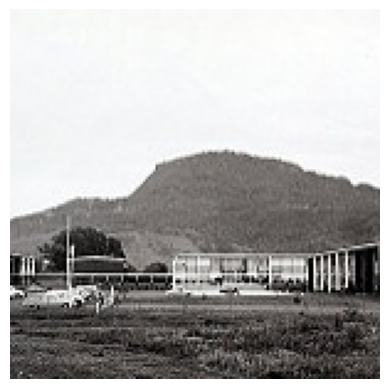

In [6]:
# Visualize image to check correctness
img = load_img(train_dir + "/buildings/0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [8]:
fig = px.bar(x=labels, y=test_data, title='Class Count Test Data')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [9]:
batch_size = 32
img_size = 150

datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.15)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = datagen.flow_from_directory(train_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                subset='training',
                                                class_mode='categorical')

validation_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_size, img_size),
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 class_mode='categorical')

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


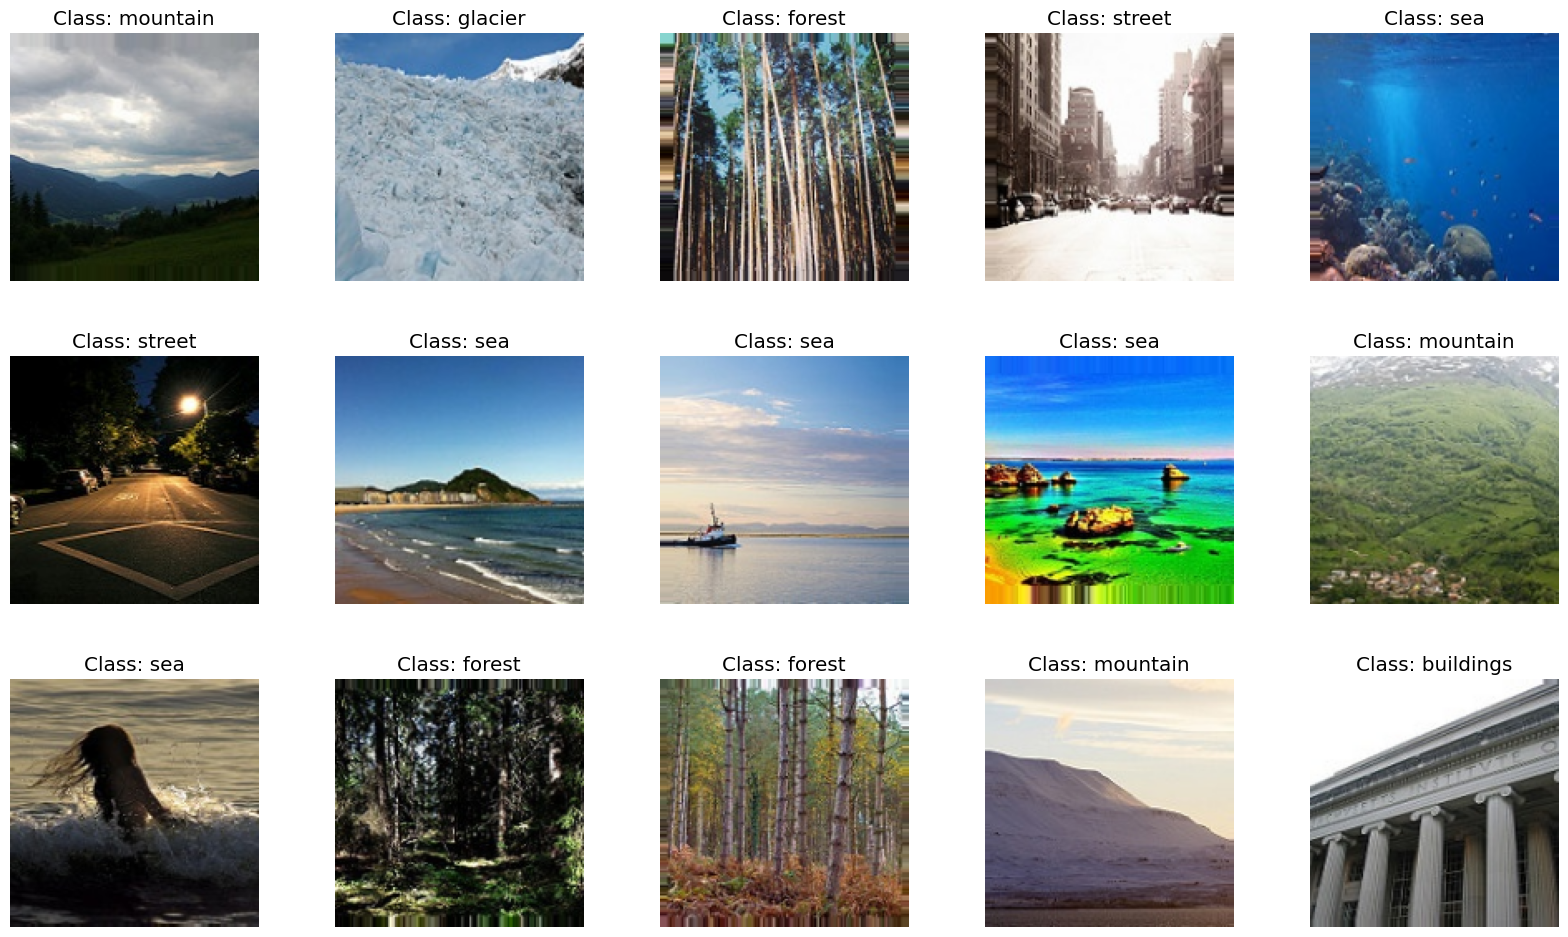

In [10]:
labels = [k for k,v in train_generator.class_indices.items()]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

# Dense Net(Pretrained)

In [ ]:
imgsize=(150,150,3)
DenseNet121 = Sequential()
pretrained_model = tf.keras.applications.DenseNet121(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
DenseNet121.add(pretrained_model)
DenseNet121.add(layers.Flatten())
# Add Dense layers
DenseNet121.add(layers.Dense(512, activation='relu'))
DenseNet121.add(layers.Dropout(0.2))  # Increase dropout
DenseNet121.add(layers.Dense(6, activation='softmax'))

# Compile the model with a lower learning rate
DenseNet121.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = DenseNet121.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
373/373 [==============================] - 111s 274ms/step - loss: 0.6343 - accuracy: 0.7792 - val_loss: 0.3520 - val_accuracy: 0.8773
Epoch 2/20
373/373 [==============================] - 95s 254ms/step - loss: 0.3829 - accuracy: 0.8612 - val_loss: 0.3243 - val_accuracy: 0.8858
Epoch 3/20
373/373 [==============================] - 94s 251ms/step - loss: 0.3254 - accuracy: 0.8794 - val_loss: 0.3159 - val_accuracy: 0.8915
Epoch 4/20
373/373 [==============================] - 93s 250ms/step - loss: 0.3022 - accuracy: 0.8910 - val_loss: 0.3009 - val_accuracy: 0.8892
Epoch 5/20
373/373 [==============================] - 95s 255ms/step - loss: 0.2901 - accuracy: 0.8890 - val_loss: 0.2818 - val_accuracy: 0.9015
Epoch 6/20
373/373 [==============================] - 101s 270ms/step - loss: 0.2704 - accuracy: 0.8983 - val_loss: 0.2854 - val_accuracy: 0.8996
Epoch 7/20
373/373 [==============================] - 93s 250ms/step - loss: 0.2518 - accuracy: 0.9074 - val_loss: 0.2723 - val_

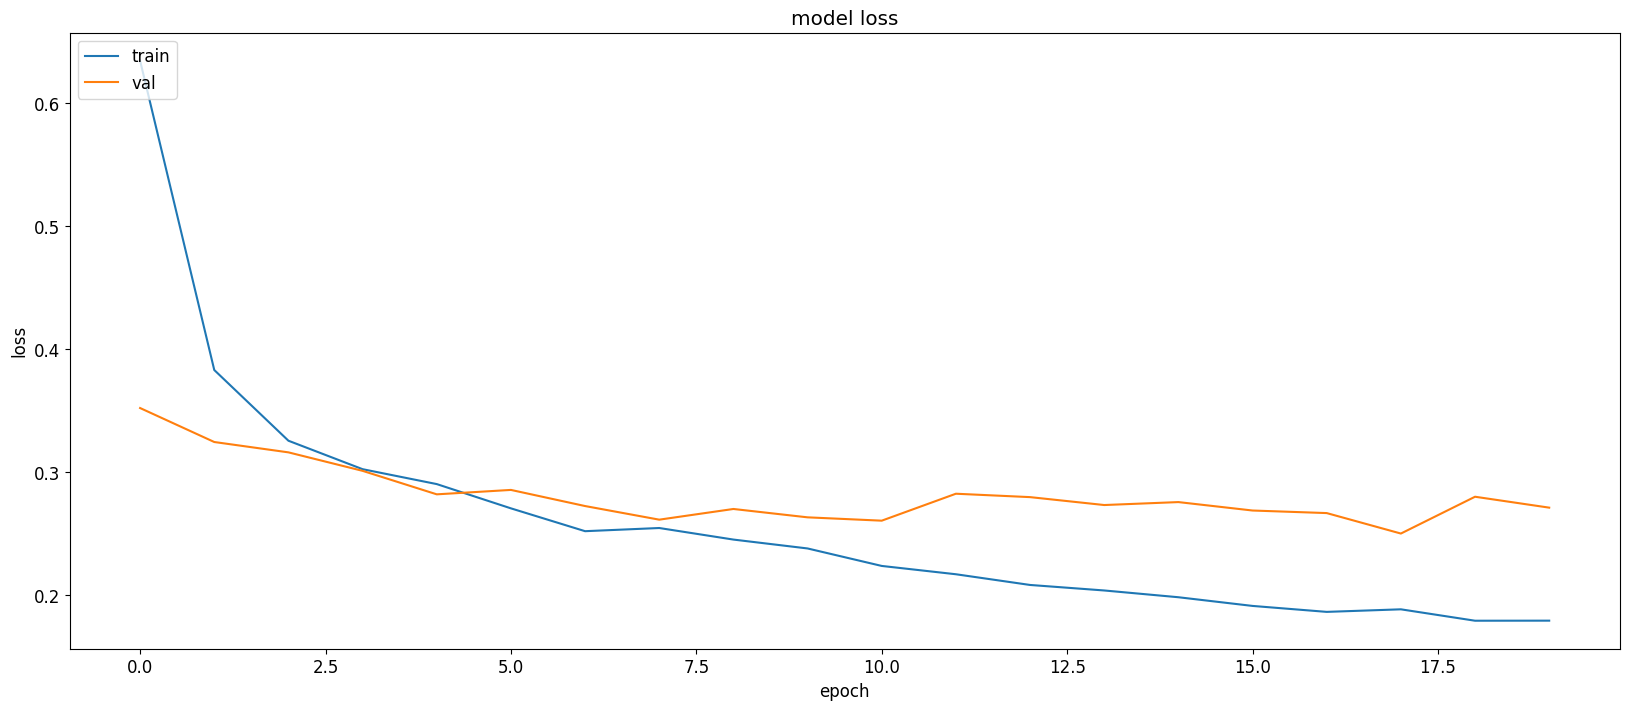

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

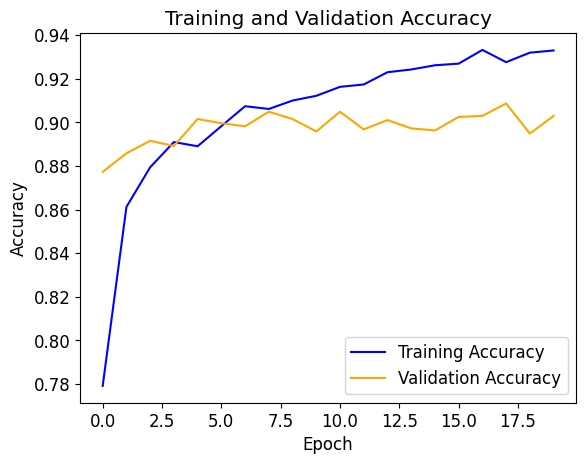

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score=DenseNet121.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 6s 59ms/step - loss: 0.2590 - accuracy: 0.9033


In [ ]:
y_test = test_generator.classes
y_pred = DenseNet121.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 6s 50ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.93      0.87      0.90       437
      forest       0.98      0.99      0.98       474
     glacier       0.85      0.82      0.84       553
    mountain       0.84      0.86      0.85       525
         sea       0.95      0.93      0.94       510
      street       0.89      0.95      0.92       501

    accuracy                           0.90      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.90      0.90      0.90      3000



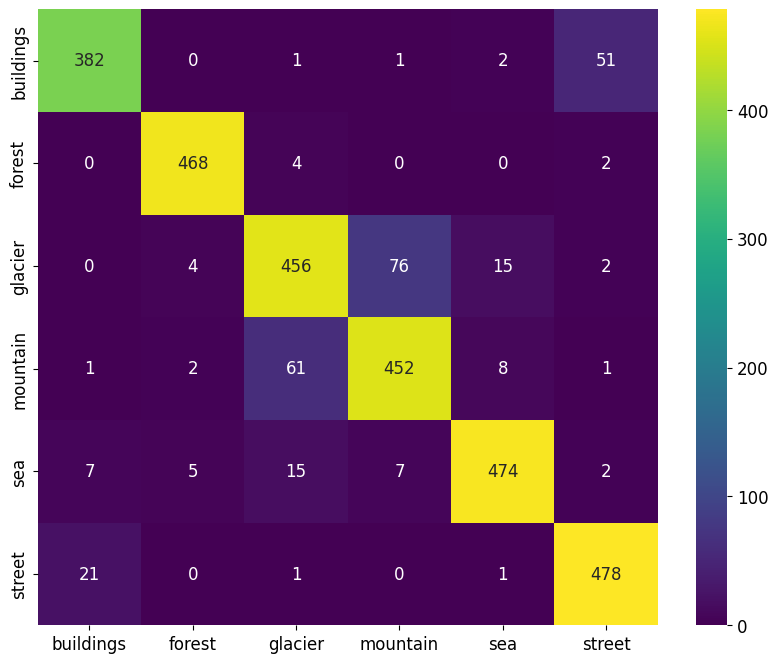

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()

#CNN(Scratch)

In [25]:
# Image size
imgsize = (150, 150, 3)

# Create a Sequential model
cnn_model = models.Sequential()

# Add convolutional layers with dropout and batch normalization
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=imgsize))
cnn_model.add(layers.MaxPooling2D((2, 2)))


cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))


cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))


cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu' ))
cnn_model.add(layers.MaxPooling2D((2, 2)))


# Flatten the output
cnn_model.add(layers.Flatten())

# Add dense layers with dropout
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.Dropout(0.5))

# Add the output layer with 6 units (assuming 6 classes) and softmax activation
cnn_model.add(layers.Dense(6, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
373/373 [==============================] - 95s 244ms/step - loss: 1.0757 - accuracy: 0.5715 - val_loss: 0.8499 - val_accuracy: 0.6760
Epoch 2/20
373/373 [==============================] - 82s 219ms/step - loss: 0.8057 - accuracy: 0.6964 - val_loss: 0.7039 - val_accuracy: 0.7402
Epoch 3/20
373/373 [==============================] - 85s 228ms/step - loss: 0.6752 - accuracy: 0.7577 - val_loss: 0.6134 - val_accuracy: 0.7807
Epoch 4/20
373/373 [==============================] - 82s 221ms/step - loss: 0.5948 - accuracy: 0.7844 - val_loss: 0.5421 - val_accuracy: 0.8069
Epoch 5/20
373/373 [==============================] - 83s 224ms/step - loss: 0.5550 - accuracy: 0.8025 - val_loss: 0.5021 - val_accuracy: 0.8240
Epoch 6/20
373/373 [==============================] - 84s 225ms/step - loss: 0.4997 - accuracy: 0.8229 - val_loss: 0.4450 - val_accuracy: 0.8378
Epoch 7/20
373/373 [==============================] - 93s 249ms/step - loss: 0.4614 - accuracy: 0.8356 - val_loss: 0.4401 - val_ac

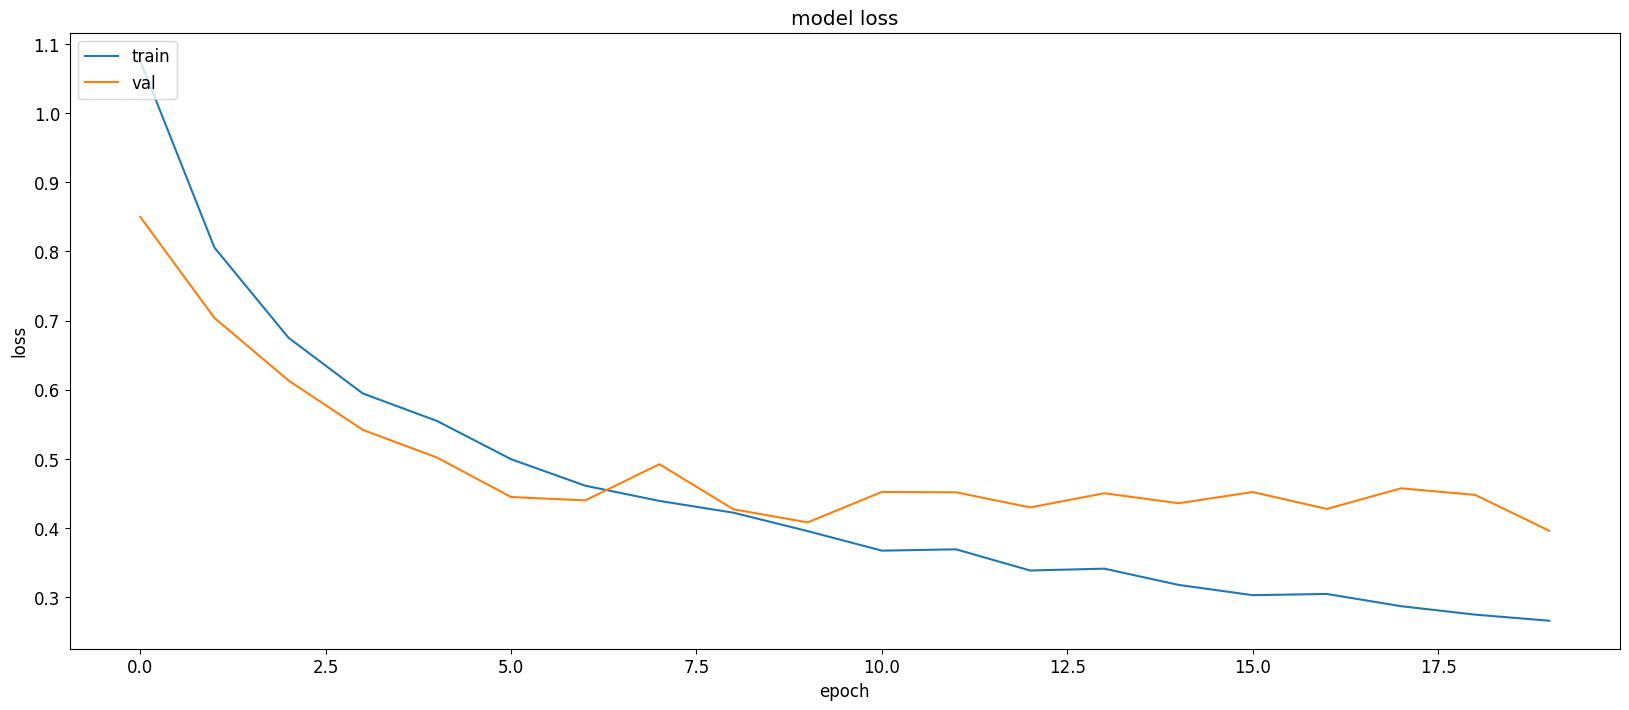

In [27]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

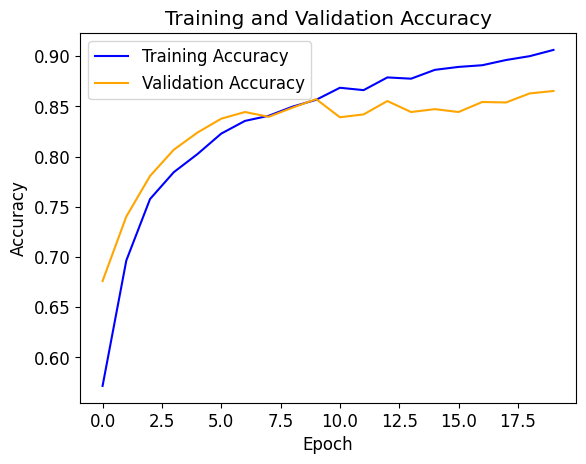

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
score=cnn_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 3s 36ms/step - loss: 0.4221 - accuracy: 0.8633


In [30]:
y_test = test_generator.classes
y_pred = cnn_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 4s 36ms/step


In [31]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.88      0.79      0.83       437
      forest       0.98      0.96      0.97       474
     glacier       0.85      0.79      0.82       553
    mountain       0.82      0.80      0.81       525
         sea       0.84      0.93      0.88       510
      street       0.83      0.92      0.87       501

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



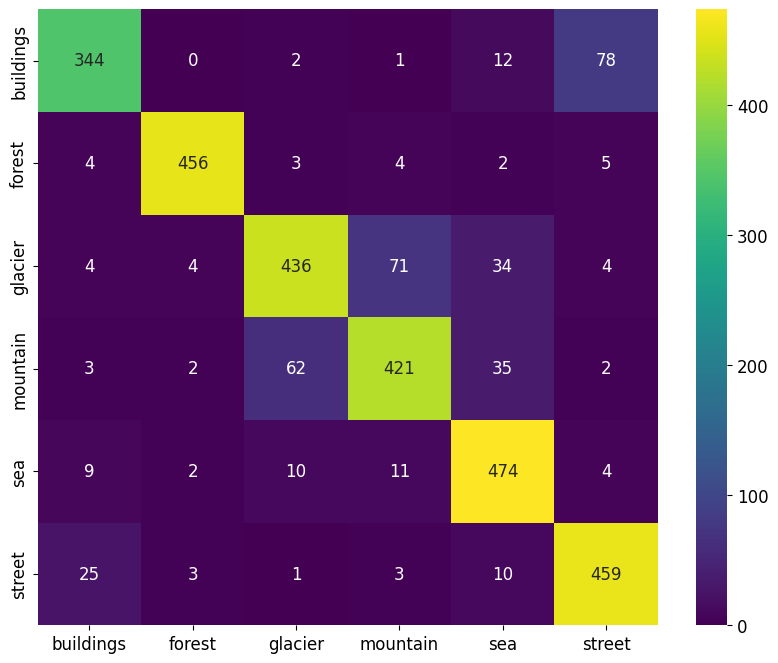

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()

#Resnet50V2(Pretrained)





In [ ]:
imgsize = (150, 150, 3)
ResNet50_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50V2(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
ResNet50_model.add(pretrained_model)
ResNet50_model.add(layers.Flatten())
ResNet50_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
ResNet50_model.add(layers.Dropout(0.1))
ResNet50_model.add(layers.Dense(6, activation='softmax'))
ResNet50_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = ResNet50_model.fit(train_generator, validation_data=validation_generator, epochs=20)
ResNet50_model.save('resnet.h5')

Epoch 1/20
373/373 [==============================] - 115s 295ms/step - loss: 0.9873 - accuracy: 0.8341 - val_loss: 0.6942 - val_accuracy: 0.8654
Epoch 2/20
373/373 [==============================] - 98s 262ms/step - loss: 0.6008 - accuracy: 0.8787 - val_loss: 0.5862 - val_accuracy: 0.8830
Epoch 3/20
373/373 [==============================] - 108s 289ms/step - loss: 0.5321 - accuracy: 0.8909 - val_loss: 0.5151 - val_accuracy: 0.9034
Epoch 4/20
373/373 [==============================] - 109s 292ms/step - loss: 0.4820 - accuracy: 0.8958 - val_loss: 0.5099 - val_accuracy: 0.8758
Epoch 5/20
373/373 [==============================] - 101s 272ms/step - loss: 0.4400 - accuracy: 0.9009 - val_loss: 0.4697 - val_accuracy: 0.8873
Epoch 6/20
373/373 [==============================] - 98s 263ms/step - loss: 0.4203 - accuracy: 0.8992 - val_loss: 0.4597 - val_accuracy: 0.8863
Epoch 7/20
373/373 [==============================] - 98s 262ms/step - loss: 0.3867 - accuracy: 0.9073 - val_loss: 0.4528 - va

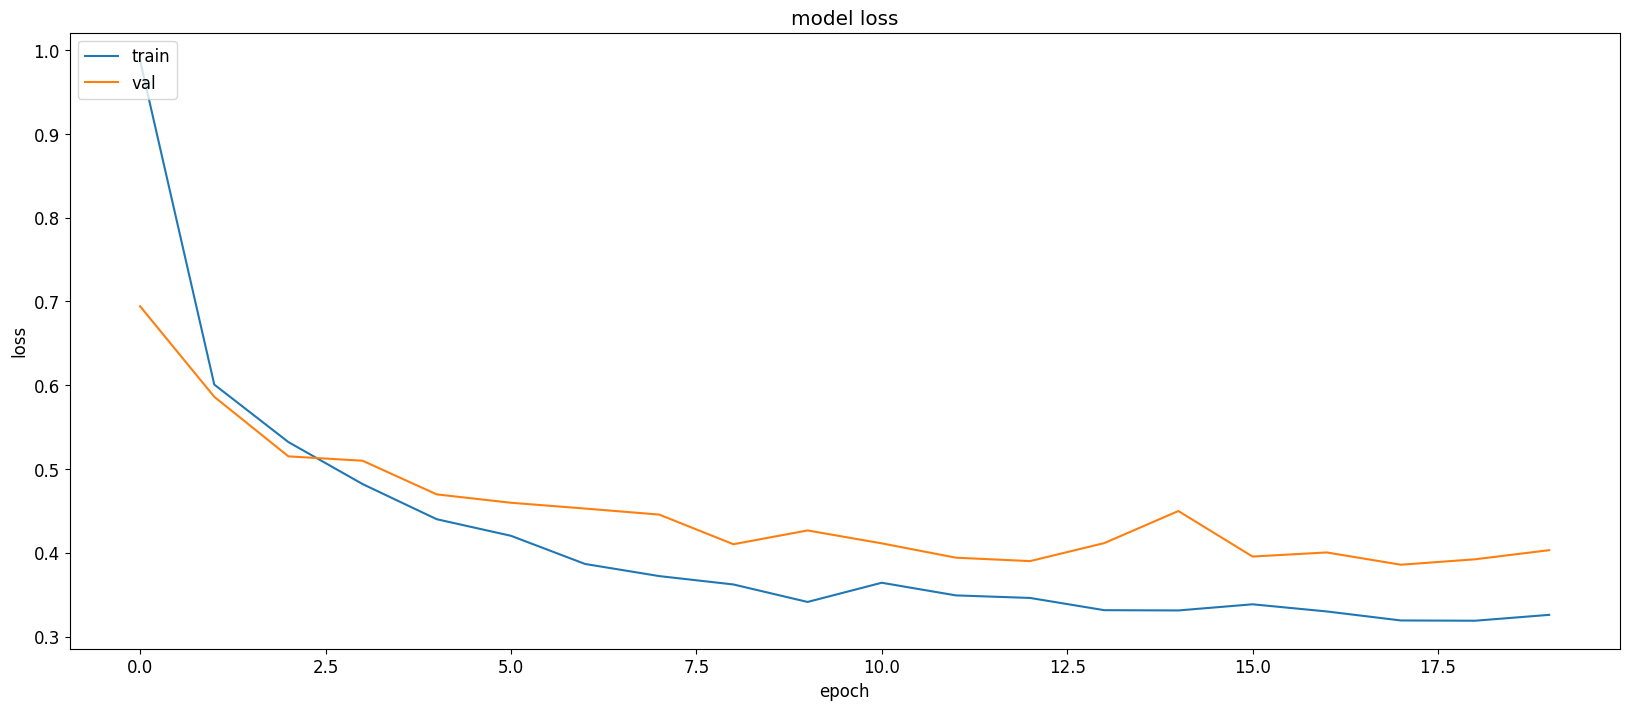

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

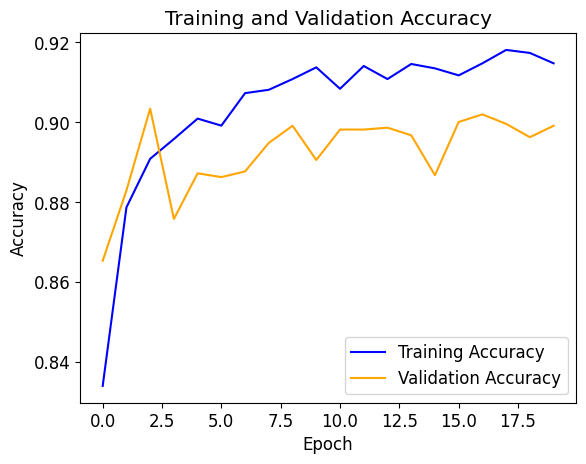

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score=ResNet50_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 7s 72ms/step - loss: 0.3779 - accuracy: 0.9053


In [ ]:
y_test = test_generator.classes
y_pred = ResNet50_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 9s 69ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.97      0.86      0.91       437
      forest       0.96      0.99      0.98       474
     glacier       0.84      0.86      0.85       553
    mountain       0.87      0.81      0.84       525
         sea       0.92      0.96      0.94       510
      street       0.90      0.96      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.90      3000



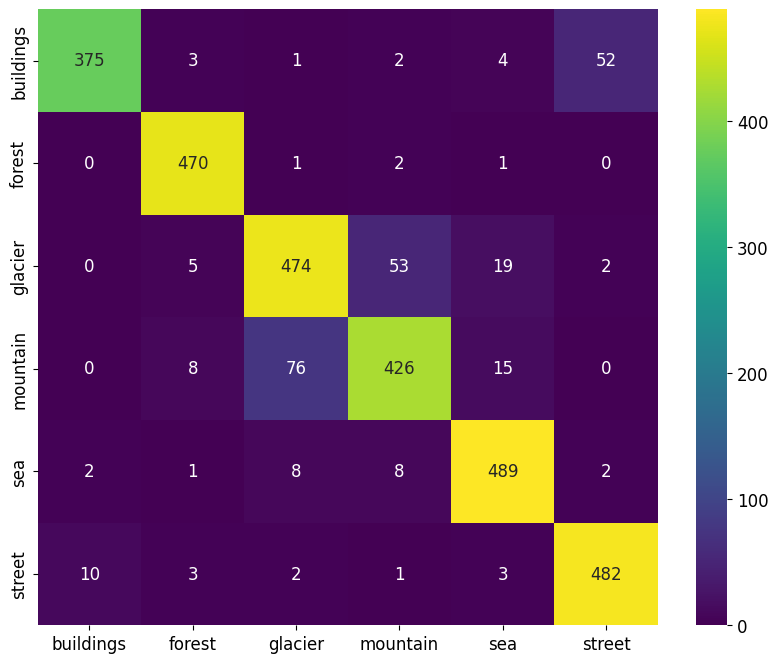

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()

#VGG16(Pretrained)

In [11]:
imgsize = (150, 150, 3)
VGG16_model = Sequential()
pretrained_model = tf.keras.applications.VGG16(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
for layer in pretrained_model.layers[-2:]:
    layer.trainable = True
VGG16_model.add(pretrained_model)
VGG16_model.add(layers.Flatten())
VGG16_model.add(layers.Dense(256, activation='relu'))
VGG16_model.add(layers.Dropout(0.3))
VGG16_model.add(layers.Dense(6, activation='softmax'))
VGG16_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
history = VGG16_model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
373/373 [==============================] - 113s 272ms/step - loss: 0.7515 - accuracy: 0.7125 - val_loss: 0.5194 - val_accuracy: 0.8030
Epoch 2/20
373/373 [==============================] - 93s 250ms/step - loss: 0.5246 - accuracy: 0.8053 - val_loss: 0.4532 - val_accuracy: 0.8335
Epoch 3/20
373/373 [==============================] - 91s 244ms/step - loss: 0.4737 - accuracy: 0.8264 - val_loss: 0.4473 - val_accuracy: 0.8316
Epoch 4/20
373/373 [==============================] - 93s 250ms/step - loss: 0.4528 - accuracy: 0.8355 - val_loss: 0.4134 - val_accuracy: 0.8373
Epoch 5/20
373/373 [==============================] - 93s 248ms/step - loss: 0.4297 - accuracy: 0.8467 - val_loss: 0.4070 - val_accuracy: 0.8478
Epoch 6/20
373/373 [==============================] - 91s 245ms/step - loss: 0.4171 - accuracy: 0.8477 - val_loss: 0.4183 - val_accuracy: 0.8406
Epoch 7/20
373/373 [==============================] - 90s 242ms/step - loss: 0.4050 - accuracy: 0.8528 - val_loss: 0.4007 - val_a

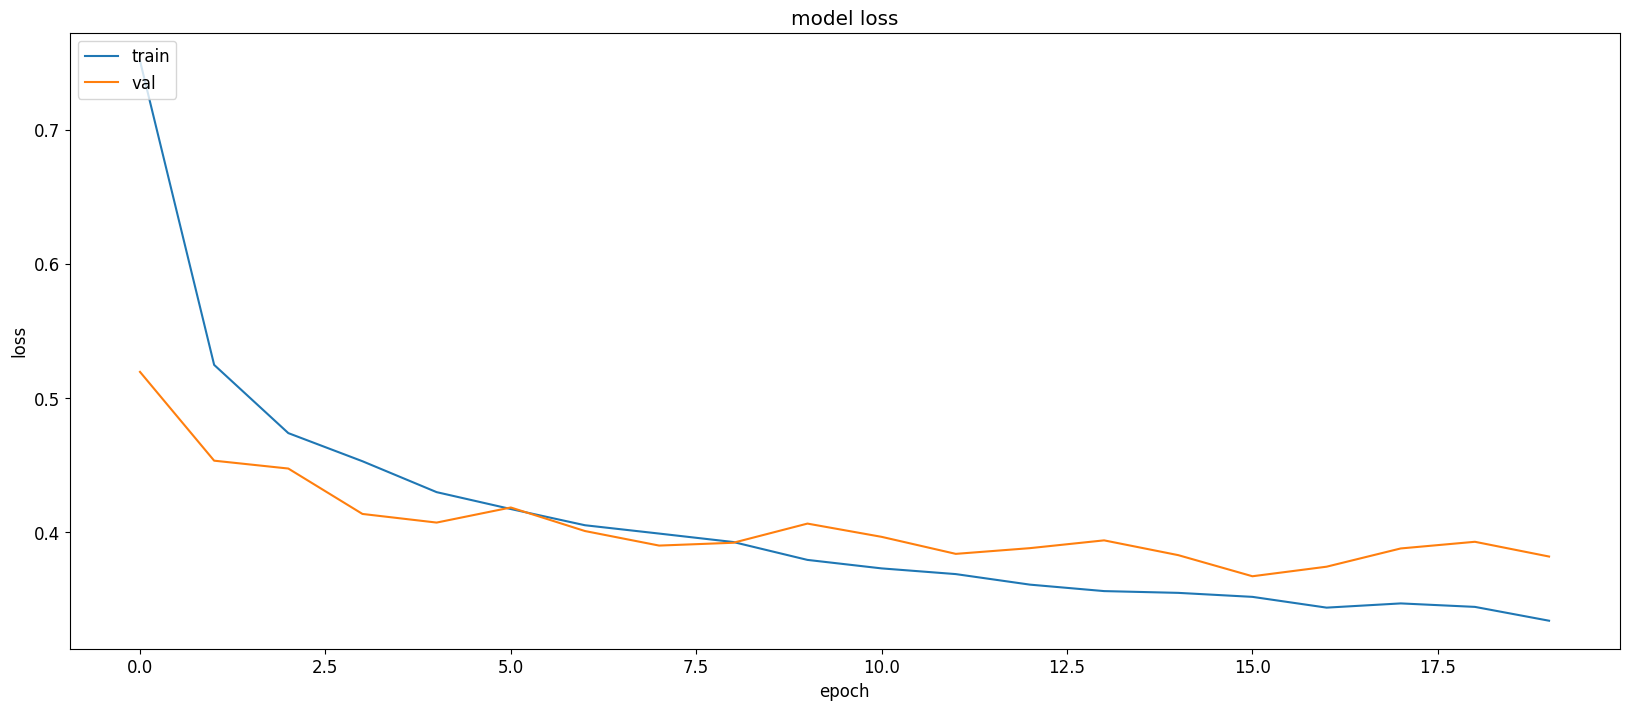

In [13]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

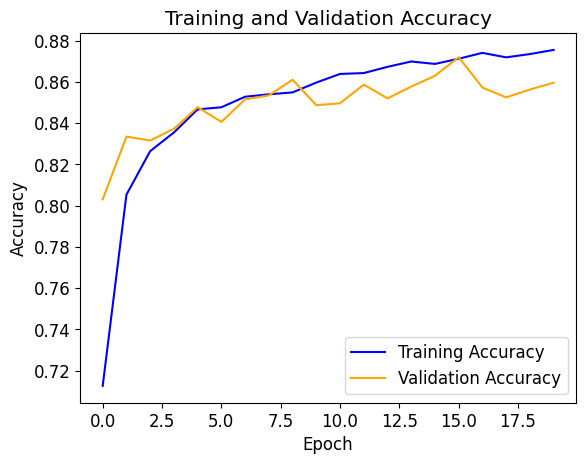

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
score=VGG16_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 9s 94ms/step - loss: 0.3539 - accuracy: 0.8680


In [16]:
y_test = test_generator.classes
y_pred = VGG16_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 6s 61ms/step


In [17]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.89      0.88      0.89       437
      forest       0.98      0.97      0.97       474
     glacier       0.85      0.77      0.81       553
    mountain       0.77      0.82      0.79       525
         sea       0.87      0.87      0.87       510
      street       0.87      0.92      0.90       501

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



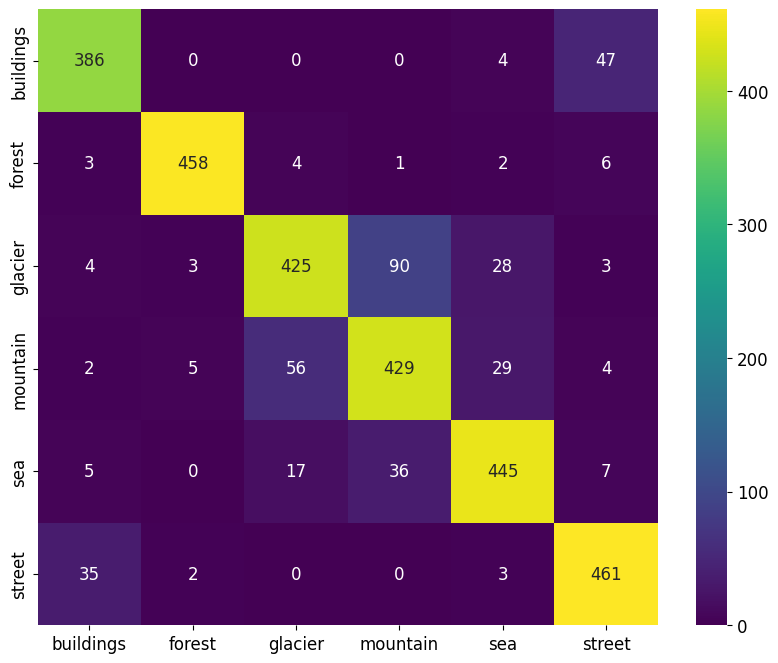

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()

#InceptionV3(Pretrained)

In [ ]:
imgsize = (150, 150, 3)
InceptionV3_model = Sequential()
pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
for layer in pretrained_model.layers[-4:]:
    layer.trainable = True
InceptionV3_model.add(pretrained_model)
InceptionV3_model.add(layers.Flatten())
InceptionV3_model.add(layers.Dense(128, activation='relu'))
InceptionV3_model.add(layers.Dropout(0.2))
InceptionV3_model.add(layers.Dense(6, activation='softmax'))
InceptionV3_model.compile(optimizer=RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = InceptionV3_model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
373/373 [==============================] - 102s 248ms/step - loss: 0.7366 - accuracy: 0.7478 - val_loss: 0.4229 - val_accuracy: 0.8459
Epoch 2/20
373/373 [==============================] - 86s 231ms/step - loss: 0.4434 - accuracy: 0.8455 - val_loss: 0.3687 - val_accuracy: 0.8654
Epoch 3/20
373/373 [==============================] - 86s 229ms/step - loss: 0.3914 - accuracy: 0.8640 - val_loss: 0.3461 - val_accuracy: 0.8730
Epoch 4/20
373/373 [==============================] - 85s 228ms/step - loss: 0.3626 - accuracy: 0.8714 - val_loss: 0.3347 - val_accuracy: 0.8796
Epoch 5/20
373/373 [==============================] - 86s 230ms/step - loss: 0.3367 - accuracy: 0.8819 - val_loss: 0.3288 - val_accuracy: 0.8792
Epoch 6/20
373/373 [==============================] - 85s 227ms/step - loss: 0.3280 - accuracy: 0.8833 - val_loss: 0.3347 - val_accuracy: 0.8711
Epoch 7/20
373/373 [==============================] - 86s 230ms/step - loss: 0.3081 - accuracy: 0.8885 - val_loss: 0.3267 - val_a

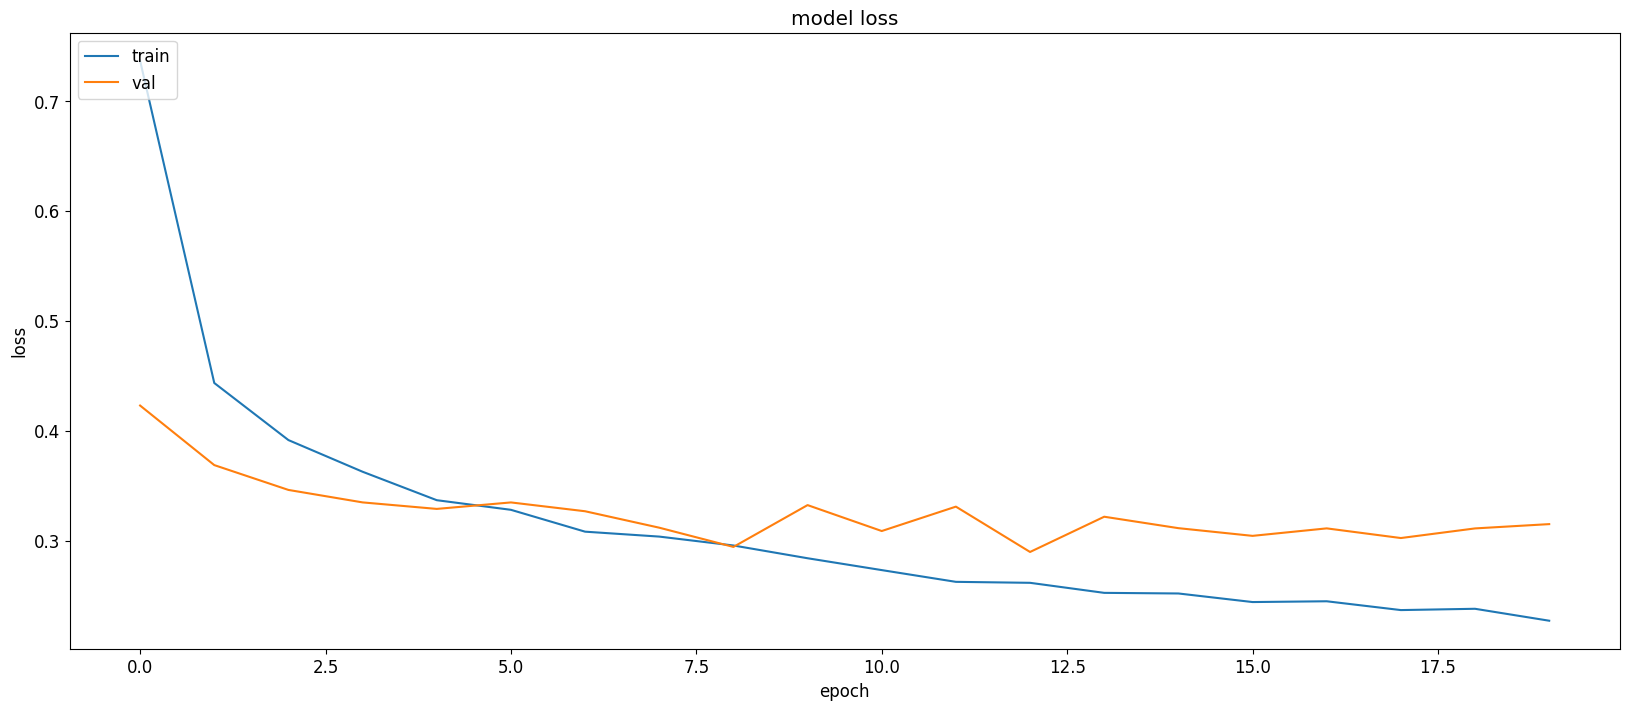

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

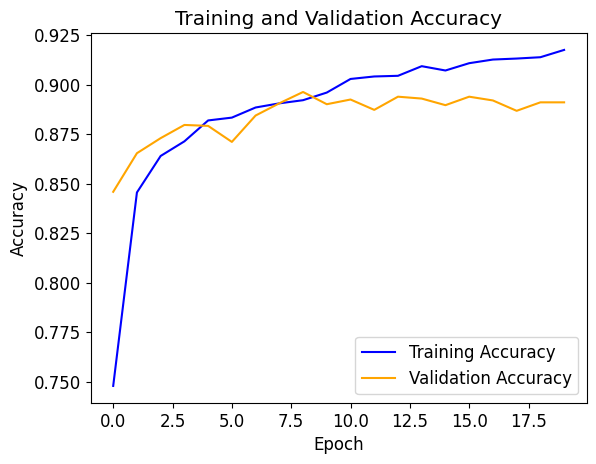

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score=InceptionV3_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 5s 56ms/step - loss: 0.2791 - accuracy: 0.9003


In [ ]:
y_test = test_generator.classes
y_pred = InceptionV3_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 6s 48ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.88      0.92      0.90       437
      forest       0.98      0.98      0.98       474
     glacier       0.83      0.86      0.85       553
    mountain       0.86      0.82      0.84       525
         sea       0.94      0.93      0.94       510
      street       0.93      0.90      0.91       501

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



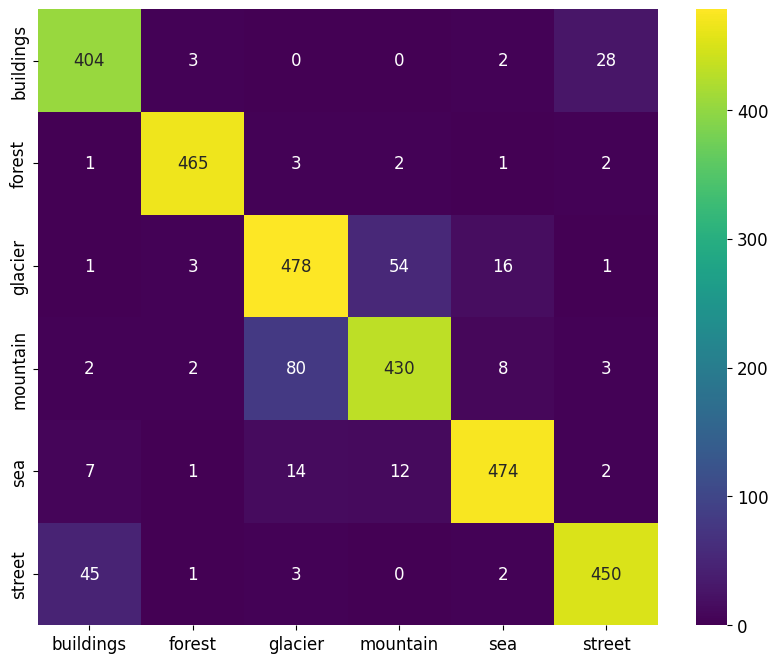

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()

# Upload from dirve


In [22]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Loading Models


In [ ]:
from tensorflow.keras.models import load_model

resnet_model = load_model('/content/drive/MyDrive/Models (ML)/resnet.h5')
CNN_model = load_model('/content/drive/MyDrive/Models (ML)/cnn.h5')
Dense_model = load_model('/content/drive/MyDrive/Models (ML)/denses.h5')
inception_model = load_model('/content/drive/MyDrive/Models (ML)/inception.h5')
VGG_model = load_model('/content/drive/MyDrive/Models (ML)/vgg.h5')

In [ ]:
resnet_score=resnet_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 8s 84ms/step - loss: 0.3779 - accuracy: 0.9053


In [35]:
CNN_score=CNN_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 8s 85ms/step - loss: 0.4221 - accuracy: 0.8633


In [ ]:
Dense_score=Dense_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 8s 88ms/step - loss: 0.2576 - accuracy: 0.9083


In [ ]:
inception_score=inception_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 5s 52ms/step - loss: 0.3141 - accuracy: 0.8913


In [24]:
VGG_model=VGG16_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 6s 66ms/step - loss: 0.3539 - accuracy: 0.8680


# gradio Implemention

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.2 MB

In [ ]:
import gradio as gr

def predict_image(img):

    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = Dense_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]


    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    predicted_label = class_names[predicted_class]

    return predicted_label


interface = gr.Interface(fn=predict_image,
                         inputs=gr.Image(type="pil"),
                         outputs="text",
                         title="Intel Classification",
                         description="Upload an image and the model will predict if it's a building, forest, sea, etc.")

interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://50c670adaeb7c2f815.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
